<a href="https://colab.research.google.com/github/Carocschall/CoderHouse/blob/main/DataScienceIII_CortezSchall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE III: NLP Y DEEP LEARNING APLICADO A LA CIENCIA DE DATOS**

**Análisis a 20 años del iNNotec: visualizando las relaciones, encuentros y desencuentros entre Ciencia, Tecnología, Negocios y Estado**



Alumna: Carolina Cortez Schall

# **Presentación del proyecto**

**Abstracto**

En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas) y la SPE de Argentina (capítulo local de la Society Of Petroleum Engineers), organizaron el iNNotec: 1er Expo-Congreso de Innovación Tecnológica en Energía y Petroquímica. A 20 años del evento es menester analizar el avance en las relaciones, encuentros y desencuentros entre Ciencia, Tecnología, Negocios y Estado

**Contexto Comercial y Analítico**

El contexto socio económico contempla la necesidad sobre la vinculación de los procesos entre la triple hélice: Estado-Empresas.Instituciones Científicas, para el efectivo desarrollo sostenible de una región.

**Preguntas/Hipótesis a Resolver**

Cuál es el avance social y económico a partir del iNNotec?

**Objetivo**

Analizar el impacto del iNNotec a lo largo de 20 años de consenso.


# **Lectura de datos**

### **Librerias necesarias**

In [8]:
!python -m spacy download es_core_news_sm
! pip install -U symspellpy
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
import spacy
import es_core_news_sm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pickle
from symspellpy import SymSpell
import pkg_resources
from symspellpy import SymSpell, Verbosity
import nltk
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 68.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Lectura del corpus**

**Carga de datos**

In [2]:


# El ensayo que analizaremos se encuentra en Medium
url = "https://medium.com/kambrica/a-20-a%C3%B1os-del-innotec-visualizando-las-relaciones-encuentros-y-desencuentros-entre-ciencia-2c3b36bb53f9"

# El código suele traer contenido que no es relevante para análisis. Para esto identificamos frases para identificar el inicio y el fin del contenido relevante
frase_inicial = "En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas)"
frase_final = "aportando lo mejor que tenemos para construir un mundo mejor."

# Enviar una solicitud GET para obtener el contenido HTML bruto
response = requests.get(url)
if response.status_code == 200: #valida si la página carga correctamente
    # Parsear el contenido HTML (para que Python lo entienda) usando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraer todo el texto de las etiquetas de párrafo
    paragraphs = soup.find_all('p')
    article_text = '\n'.join([para.get_text() for para in paragraphs])#se une todo el texto y separa salto de linea

    # Extraer la porción relevante del texto
    start_index = article_text.find(frase_inicial)
    end_index = article_text.find(frase_final) + len(frase_final)
#Si ambas frases (inicial y final) se encuentran en el texto, se extrae el bloque de texto entre esas frases.
    if start_index != -1 and end_index != -1:
        texto_relevante = article_text[start_index:end_index]
        print(texto_relevante)
    else:
        print("No se encontraron las frases especificadas en el artículo.")
else:
    print(f"Fallo al recuperar la página web. Código de estado: {response.status_code}")

En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas) y la SPE de Argentina (capítulo local de la Society Of Petroleum Engineers), organizaron el iNNotec: 1er Expo-Congreso de Innovación Tecnológica en Energía y Petroquímica.
El Director General del IAPG, Roberto E. Cunningham, decidicó que un congreso de innovación merecía una introducción innovadora: su “Sainete Criollo de Inocencio Ricerca y Empresio Mandattori”.
En lugar de un tradicional discurso, desarrolló los temas de la conferencia en una obra de teatro leído, que sería dirigida por Claudio Moreno e interpretada por Páncho Ibáñez y Hugo Bob Quintela, con el apoyo de infografías, animaciones e imágenes situacionales cuyo diseño y desarrollo tuve a cargo.
En sus propias palabras:
…Sentí la necesidad de redactar algunas pautas, algo así como un manual instructivo a ser seguido por un científico toda vez que le tocara exponer ante un empresario. Así lo hice, pero no quedé conforme, pues veía el texto desarrollado como

In [69]:
#Aplicamos metodo  para tokenizar oracion
tokenized_oracion=sent_tokenize(texto_relevante)
print(tokenized_oracion)

['En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas) y la SPE de Argentina (capítulo local de la Society Of Petroleum Engineers), organizaron el iNNotec: 1er Expo-Congreso de Innovación Tecnológica en Energía y Petroquímica.', 'El Director General del IAPG, Roberto E. Cunningham, decidicó que un congreso de innovación merecía una introducción innovadora: su “Sainete Criollo de Inocencio Ricerca y Empresio Mandattori”.', 'En lugar de un tradicional discurso, desarrolló los temas de la conferencia en una obra de teatro leído, que sería dirigida por Claudio Moreno e interpretada por Páncho Ibáñez y Hugo Bob Quintela, con el apoyo de infografías, animaciones e imágenes situacionales cuyo diseño y desarrollo tuve a cargo.', 'En sus propias palabras:\n…Sentí la necesidad de redactar algunas pautas, algo así como un manual instructivo a ser seguido por un científico toda vez que le tocara exponer ante un empresario.', 'Así lo hice, pero no quedé conforme, pues veía el texto de

In [3]:


# Download'punkt_tab'
nltk.download('punkt_tab')

# tokenización de palabras
tokenized_palabra = word_tokenize(texto_relevante)
print(tokenized_palabra)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['En', '2004', ',', 'el', 'IAPG', '(', 'Instituto', 'Argentino', 'del', 'Petróleo', 'y', 'el', 'Gas', ')', 'y', 'la', 'SPE', 'de', 'Argentina', '(', 'capítulo', 'local', 'de', 'la', 'Society', 'Of', 'Petroleum', 'Engineers', ')', ',', 'organizaron', 'el', 'iNNotec', ':', '1er', 'Expo-Congreso', 'de', 'Innovación', 'Tecnológica', 'en', 'Energía', 'y', 'Petroquímica', '.', 'El', 'Director', 'General', 'del', 'IAPG', ',', 'Roberto', 'E.', 'Cunningham', ',', 'decidicó', 'que', 'un', 'congreso', 'de', 'innovación', 'merecía', 'una', 'introducción', 'innovadora', ':', 'su', '“', 'Sainete', 'Criollo', 'de', 'Inocencio', 'Ricerca', 'y', 'Empresio', 'Mandattori', '”', '.', 'En', 'lugar', 'de', 'un', 'tradicional', 'discurso', ',', 'desarrolló', 'los', 'temas', 'de', 'la', 'conferencia', 'en', 'una', 'obra', 'de', 'teatro', 'leído', ',', 'que', 'sería', 'dirigida', 'por', 'Claudio', 'Moreno', 'e', 'interpretada', 'por', 'Páncho', 'Ibáñez', 'y', 'Hugo', 'Bob', 'Quintela', ',', 'con', 'el', 'apoyo

**Análisis de la Frecuencia de Palabras**

In [77]:


# Assuming 'path' is a list of lists or a 2D numpy array containing strings:

# Create a dictionary to store word frequencies
frecuencia_total = {}

# Iterate through all strings in 'path'
for sublist in path:  # If path is a list of lists
    for word in sublist:
        frecuencia_total[word] = frecuencia_total.get(word, 0) + 1
        # If word is not in dictionary, initialize to 0 and add 1
        # If word is in dictionary, increment count by 1

# Convert the dictionary to a list of (word, frequency) tuples
frecuencia_total_list = list(frecuencia_total.items())

# Sort the list by frequency in descending order
frecuencia_total_list.sort(key=lambda item: item[1], reverse=True)

# Get the top 5 most frequent words and their frequencies
palabras_mas_frecuentes = [word for word, freq in frecuencia_total_list[:5]]
frecuencias_mas_frecuentes = [freq for word, freq in frecuencia_total_list[:5]]

# Print the results
print("Palabras más frecuentes:")
for palabra, frecuencia in zip(palabras_mas_frecuentes, frecuencias_mas_frecuentes):
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes:
/: 8
e: 5
s: 5
o: 4
a: 4


**Conteo de palabras**

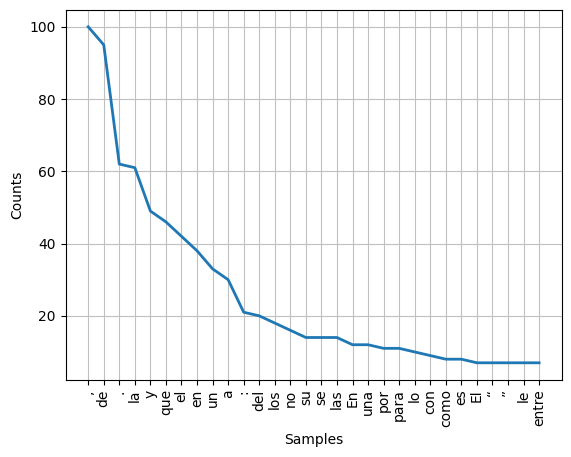

In [70]:
fdist = FreqDist(tokenized_palabra)
fdist.plot(30,cumulative=False)
plt.show()

**Stopwords**

In [71]:
#usamos los stopwords en espanol y damos un vistazo
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'como', 'tenían', 'hubieran', 'serás', 'estad', 'míos', 'vosotras', 'otros', 'tendré', 'tuviera', 'tuyas', 'tuvierais', 'habré', 'fuesen', 'con', 'quien', 'habría', 'habíamos', 'estemos', 'éramos', 'los', 'fuéramos', 'habían', 'teníais', 'estéis', 'sea', 'en', 'estuvisteis', 'soy', 'todo', 'hemos', 'nosotras', 'tenidos', 'mucho', 'hubimos', 'está', 'estaba', 'estaremos', 'hubo', 'unos', 'estáis', 'estas', 'estadas', 'estoy', 'han', 'hube', 'tenías', 'eras', 'antes', 'habida', 'tuvieras', 'hayas', 'sí', 'pero', 'fuerais', 'esté', 'cual', 'estaríais', 'ese', 'estaría', 'hubiste', 'habrá', 'serías', 'todos', 'hubieras', 'hayamos', 'sentidos', 'estará', 'vuestra', 'un', 'tengáis', 'sentid', 'ella', 'tuvieran', 'algunos', 'mías', 'sintiendo', 'fuiste', 'teniendo', 'fueron', 'y', 'tuyo', 'tuvieseis', 'seríais', 'poco', 'tendrán', 'seréis', 'para', 'de', 'quienes', 'estuvieras', 'serán', 'habrán', 'porque', 'tuviésemos', 'también', 'hubiese', 'tendría', 'tuviese', 'tenía', 'durante', 'tendre

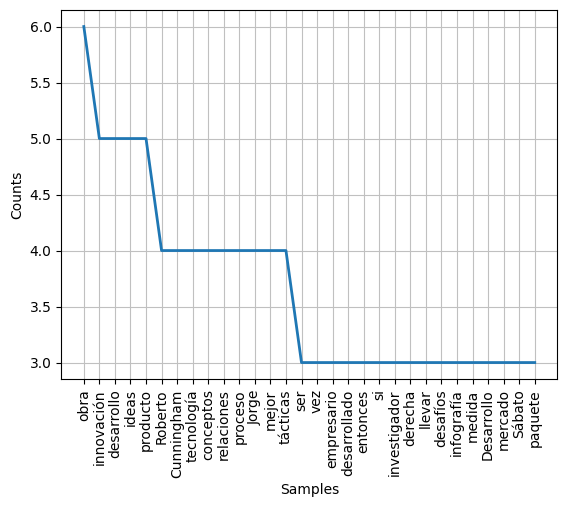

In [72]:
#Ahora comparamos el gráfico de frecuencia de palabras con y sin stopwords adicionalmente excluimos los símbolos
tokenized_palabra_stopwords = [word for word in tokenized_palabra if word.lower() not in stop_words and word.isalpha()]

# Calculamos la distribución de frecuencia
fdist_stopwords = FreqDist(tokenized_palabra_stopwords)
# Graficamos la distribución de frecuencia del top 30 palabras mas conumes
fdist_stopwords.plot(30, cumulative=False)
plt.show()

**Nube de palabras**

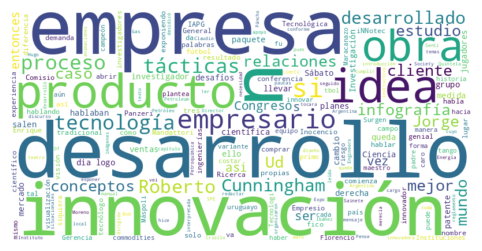

In [73]:
# Creamos un objeto de nube de palabras
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    stopwords = stop_words
).generate(texto_relevante)

# Mostramos la nube de palabras generada
plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Análisis de N-gramas**

In [74]:
# Aplicamos funcion para calcular n-grams
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return Counter(n_grams)

# Calcular bigrams, trigrams y 4-grams
bigrams = get_ngrams(tokenized_palabra_stopwords, 2)
trigrams = get_ngrams(tokenized_palabra_stopwords, 3)
fourgrams = get_ngrams(tokenized_palabra_stopwords, 4)

# Imprimir los n-grams más comunes
print("Bigrams más comunes:")
print(bigrams.most_common(10))

print("\nTrigrams más comunes:")
print(trigrams.most_common(10))

print("\n4-grams más comunes:")
print(fourgrams.most_common(10))

Bigrams más comunes:
[(('Roberto', 'Cunningham'), 3), (('Inocencio', 'Ricerca'), 2), (('Empresio', 'Mandattori'), 2), (('lugar', 'tradicional'), 2), (('propias', 'palabras'), 2), (('conceptos', 'relaciones'), 2), (('desafíos', 'llevar'), 2), (('Jorge', 'Sábato'), 2), (('Empresas', 'Instituciones'), 2), (('innovar', 'puede'), 2)]

Trigrams más comunes:
[(('innovar', 'puede', 'costar'), 2), (('puede', 'costar', 'caro'), 2), (('IAPG', 'Instituto', 'Argentino'), 1), (('Instituto', 'Argentino', 'Petróleo'), 1), (('Argentino', 'Petróleo', 'Gas'), 1), (('Petróleo', 'Gas', 'SPE'), 1), (('Gas', 'SPE', 'Argentina'), 1), (('SPE', 'Argentina', 'capítulo'), 1), (('Argentina', 'capítulo', 'local'), 1), (('capítulo', 'local', 'Society'), 1)]

4-grams más comunes:
[(('innovar', 'puede', 'costar', 'caro'), 2), (('IAPG', 'Instituto', 'Argentino', 'Petróleo'), 1), (('Instituto', 'Argentino', 'Petróleo', 'Gas'), 1), (('Argentino', 'Petróleo', 'Gas', 'SPE'), 1), (('Petróleo', 'Gas', 'SPE', 'Argentina'), 1)

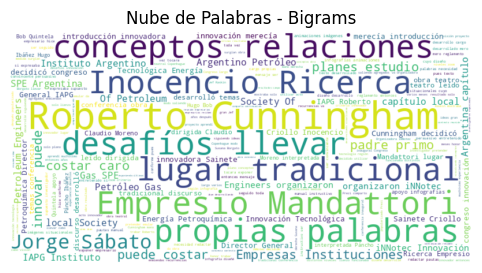

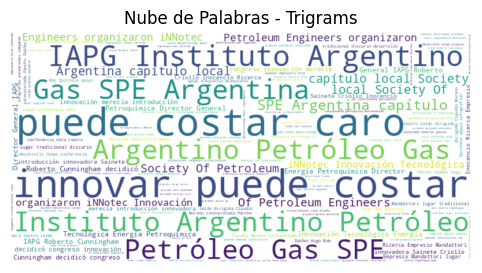

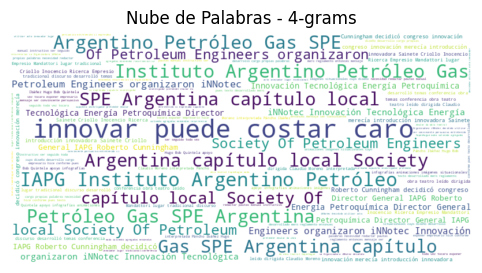

In [75]:
def generate_wordcloud(ngrams_counter, title):
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_dict)

    plt.figure(figsize=(8, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generar nubes de palabras para cada n-grama
generate_wordcloud(bigrams, 'Nube de Palabras - Bigrams')
generate_wordcloud(trigrams, 'Nube de Palabras - Trigrams')
generate_wordcloud(fourgrams, 'Nube de Palabras - 4-grams')

**Análisis de las Partes del Discurso (POS)**

In [79]:

# Download taggers if necessary
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to label parts of speech
def pos_tagging(texto):
    tokens = word_tokenize(texto)
    return pos_tag(tokens)

# Define the DF
data = [['Páncho Ibáñez', 10, 'El diálogo que va a continuación, y que la Comisión Organizadora de iNNotec ha decidido utilizar, en un acto innovador'],
        ['Hugo Bob Quintela', 12, 'Ael mensaje podría ser más convincente y persuasivo'],
        ['ClarkeEmpresio Mandattori', 13, 'su interés está en su cliente, no en el desarrollo de productos sin demanda']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Steamming**

In [83]:
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
# Crear una instancia del SnowballStemmer para español
stemmer = SnowballStemmer('spanish')

# Definir una frase de ejemplo
frase = "logró entrelazar ciencia, tecnología, políticas públicas… y también tango y fútbol."

In [87]:
# Tokenizar la frase en palabras individuales
palabras = word_tokenize(frase, language='spanish')
print(palabras)

['logró', 'entrelazar', 'ciencia', ',', 'tecnología', ',', 'políticas', 'públicas…', 'y', 'también', 'tango', 'y', 'fútbol', '.']


In [88]:
# Aplicar stemming a cada palabra
palabras_stemmizadas = [stemmer.stem(palabra) for palabra in palabras]

In [89]:
# Mostrar el resultado
print("Frase original:")
print(frase)
print("\nPalabras después de aplicar stemming:")
print(palabras_stemmizadas)

Frase original:
logró entrelazar ciencia, tecnología, políticas públicas… y también tango y fútbol.

Palabras después de aplicar stemming:
['logr', 'entrelaz', 'cienci', ',', 'tecnolog', ',', 'polit', 'publicas…', 'y', 'tambien', 'tang', 'y', 'futbol', '.']


**Lematización**

In [90]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [91]:


# Crear una instancia del WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Definir una frase de ejemplo
sentence = "The cats are running faster than the dogs and the children are playing with their toys"

# Tokenizar la frase en palabras individuales
words = word_tokenize(sentence)

# Aplicar lematización a cada palabra
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Mostrar el resultado
print("Original Sentence:")
print(sentence)
print("\nLemmatized Words:")
print(lemmatized_words)

Original Sentence:
The cats are running faster than the dogs and the children are playing with their toys

Lemmatized Words:
['The', 'cat', 'are', 'running', 'faster', 'than', 'the', 'dog', 'and', 'the', 'child', 'are', 'playing', 'with', 'their', 'toy']


**Árbol de análisis (Parse Tree)**

In [92]:
# Definir una frase
sentence = "el dilema del subdesarrollo: en un país desarrollado, a una empresa que no invierte en innovar le puede costar muy caro"

# Procesar la frase
doc = nlp(sentence)

# Mostrar las relaciones de dependencia y el árbol de análisis
for token in doc:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")

# Dibujar el árbol de análisis sintáctico
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

el -> det -> dilema
dilema -> nsubj -> costar
del -> case -> subdesarrollo
subdesarrollo -> nmod -> dilema
: -> punct -> país
en -> case -> país
un -> det -> país
país -> obl -> costar
desarrollado -> amod -> país
, -> punct -> empresa
a -> case -> empresa
una -> det -> empresa
empresa -> nmod -> país
que -> nsubj -> invierte
no -> advmod -> invierte
invierte -> acl -> empresa
en -> mark -> innovar
innovar -> xcomp -> invierte
le -> obj -> costar
puede -> aux -> costar
costar -> ROOT -> costar
muy -> advmod -> caro
caro -> obj -> costar


VERB: Verbo principal: Invierte, innovar y costar.

ADJ: Cláusula adjetival: caro, desarrollado.

ADV: Complemento adjetivo; un adjetivo que modifica directamente a un sustantivo: muy, no,

ADP: Cláusula adverbial: en, a, del.

DET: Modificador adverbial: el, un, una.

AUX: Auxiliar: puede.

NOUN: Sustantivo: dilema, subdesarrollo, país, empresa.

PRON: que, le.

**POS tagging (Part-of-Speech tagging)**

In [93]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

**Conclusiones del Analisis exploratorio**


En este trabajo se analiza el ensayo "A 20 años del iNNotec: visualizando las relaciones, encuentros y desencuentros entre Ciencia, Tecnología, Negocios y Estado". En el mismo se utilizan diversas técnicas de minería de texto. En este análisis, se identifican el impacto de palabras clave y n-grams que resaltan los conceptos principales que indican el impacto en los discursos. En los que se destaca a la Innovación y el desarrollo entre los conceptos de mayor peso.

# **Modelos**

**Definición del problema**

**Abstracto**

El trabajo busca analizar la recopilación de comentarios variados de diez juegos distintos. El objetivo principal es entrenar un modelo de Procesamiento de Lenguaje Natural con el fin de clasificar los comentarios como positivos o negativos.

**Contexto**

EL dataset busca ayudar a mejorar la comprensión y clasificación de comentarios en el ámbito de los videojuegos, lo que a su vez podría tener aplicaciones en la industria del gaming, como la generación de estrategias de marketing más efectivas y la toma de decisiones basada en el feedback de los usuarios.

**Objetivos**

El objetivo principal de este proyecto es desarrollar un modelo de deep learning que pueda clasificar los comentarios en positivos y negativos. Además, se busca comparar el rendimiento de diferentes arquitecturas de redes neuronales, desde modelos simples hasta modelos más complejos, evaluando cómo cada modificación impacta en la precisión y generalización del modelo.

**Aplicación con un modelo BoW y uno TF-IDF**

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [171]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("giottomillan/reviews-videogames")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/giottomillan/reviews-videogames/versions/1


Se toman algunas valoraciones del dataset para el ejercicio de la implementación de los modelos de clasificación.

In [9]:
# Selección de valoraciones
data = {
                      'valoración':
 [
    "10 febrero actualmente recomiendo juego contaba requisitos necesarios poder jugarlo llevado disgusto...",
    "9 febrero increíblemente gracioso ver cómo cdpr después catástrofe cyberpunk 2077 esfuerza cada vez ...",
    "el mundo en este juego es extremadamente estático casi no hay interacción que puedas hacer el npc ai es algo",
    "cero rejugabilidad terminé este juego en cerca de 100 horas y más o menos 100ed el juego después de eso",
    "horribleeste es el peor fifa que he jugado la mecanica es tan mala no malgastes tu dinero",
    "15 enero el ea anticheat hace que el juego no se inicie o no guarde tus progresos cuando",
    "9 abril jugado fifa 19 21 22 antelacion puedo decir peor launcher concha atomica optimizaron microon",
    "muchos bugs juego online lento",
    "arruinó el juego con actualizaciones constantes de las que ya se encarga la comunidad de modding",
    "muuuy aburrido",
    "producto reembolsado juego anda 120 fps estables ultra resolucion 1360x1280 putridos quince minutos",
    "creo que es un buen paso para el pc de la vieja gen a la nueva sin embargo fut gameplay es hella lento y clunk",
    "esperad ver hacen pobre rendimiento pronto compréis salvo pc muuuy superior requisitos recomendados",
    "juego pasa bueno bugfix hotfix fix parche anterior parche rompe sigueque pida procesador potente phe",
    "querida empresa ea puede compensar a todos por este tiempo y dinero yo represento la voz de cada usuario",
    "13 febrero optimicen parches jugable recomiendo verguenza usuarios requisitos superiores pide ande m...",
    "pagado por el juego y ni siquiera se inicia patético realmente ea son un caos no compre esto es happenin.",
    "13 febrero siemprebuen juego pesimo rendimientoya pirata ver si actualizan quitan denuvo mejorar ren..",
    "pagado por el juego y ni siquiera se inicia patético realmente ea son un caos no compre esto es happenin.",
    "simplificar mi reviewive tenía tantos errores de ruptura de juego en mi tiempo de juego que mi guardar ahora no es playa..",
    "7 enero encima juego garcha crashea mitad partidos anticheat verga pusieron apaga pcmorite ea concha",
    "la historia es genial pero los gamesystems son apenas carne a cabo errores gráficos socavar la historia todo",
    "corto y fácil de entender no compre esto",
    "buen juego rendimiento flojete esperemos arreglen base parches si lleva negativo pleno 2022 from sof.",
    "no te equivoques skyrim es un gran juego donde te divertiras mucho pero no puedo recomendar",
    "actualice driver 2060 funcionara mejor arreglo problema hacen esperar 10 minutos optimizacion eviden",
    "despues de comprar la ultimate edition y tener problemas con el early access he solucionado el problema de lanzamiento",
    "3 marzo primeras horas geniales cinemática inicial soprendió giro animaciones detalle thestrals lleg..",
    "bella manera de una actualización no arreglar cualquier problema sólo añadir cosas que la gente utiliza para obtener 4 gratis"
    ],
        'clasificacion': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
                      1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}

df = pd.DataFrame


In [14]:
# Correct:
df = pd.DataFrame(data)
df.loc[0]  # Accessing the first row using label-based indexing

# Separar características (valoración) y objetivo (clasificacion)
X = df['valoración']
y = df['clasificacion']

In [15]:
X

,valoración
0,10 febrero actualmente recomiendo juego contab...
1,9 febrero increíblemente gracioso ver cómo cdp...
2,el mundo en este juego es extremadamente estát...
3,cero rejugabilidad terminé este juego en cerca...
4,horribleeste es el peor fifa que he jugado la ...
5,15 enero el ea anticheat hace que el juego no ...
6,9 abril jugado fifa 19 21 22 antelacion puedo ...
7,muchos bugs juego online lento
8,arruinó el juego con actualizaciones constante...
9,muuuy aburrido


In [16]:
y

,clasificacion
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,0
9,1


In [17]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Inicializar el CountVectorizer (BoW)
vectorizador_bow = CountVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_bow = vectorizador_bow.fit_transform(X_train)

In [19]:
X_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
# Transformar las reseñas de prueba
X_test_bow = vectorizador_bow.transform(X_test)

print("Vocabulario BoW:", vectorizador_bow.get_feature_names_out())
print("Matriz BoW de entrenamiento:\n", X_train_bow.toarray())

Vocabulario BoW: ['10' '100' '100ed' '120' '13' '1360x1280' '15' '19' '2022' '2060' '2077'
 '21' '22' 'abril' 'actualice' 'actualización' 'actualizan' 'ahora' 'ai'
 'algo' 'anda' 'ande' 'antelacion' 'anterior' 'anticheat' 'apaga'
 'arreglar' 'arreglen' 'arreglo' 'atomica' 'añadir' 'base' 'bella' 'buen'
 'bueno' 'bugfix' 'bugs' 'cada' 'caos' 'casi' 'catástrofe' 'cdpr' 'cerca'
 'cero' 'clunk' 'compensar' 'compre' 'concha' 'cosas' 'crashea' 'creo'
 'cualquier' 'cuando' 'cyberpunk' 'cómo' 'de' 'decir' 'denuvo' 'después'
 'dinero' 'divertiras' 'donde' 'driver' 'ea' 'el' 'embargo' 'empresa' 'en'
 'encima' 'enero' 'equivoques' 'errores' 'es' 'esfuerza' 'eso' 'esperar'
 'esperemos' 'estables' 'este' 'esto' 'estático' 'eviden' 'extremadamente'
 'febrero' 'fifa' 'fix' 'flojete' 'fps' 'from' 'funcionara' 'fut'
 'gameplay' 'garcha' 'gen' 'gente' 'gracioso' 'gran' 'gratis' 'guardar'
 'guarde' 'hace' 'hacen' 'hacer' 'happenin' 'hay' 'he' 'hella' 'horas'
 'horribleeste' 'hotfix' 'increíblemente' 'ini

In [21]:
# Entrenar el modelo de Regresión Logística con Bag of Words
modelo_bow = LogisticRegression()
modelo_bow.fit(X_train_bow, y_train)

LogisticRegression()

In [22]:
# Hacer predicciones en el conjunto de prueba
y_pred_bow = modelo_bow.predict(X_test_bow)

In [23]:
# Calcular la precisión del modelo
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Precisión usando Bag of Words:", accuracy_bow)

Precisión usando Bag of Words: 0.3333333333333333


In [24]:
# Inicializar el TfidfVectorizer
vectorizador_tfidf = TfidfVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

print("Vocabulario TF-IDF:", vectorizador_tfidf.get_feature_names_out())
print("Matriz TF-IDF de entrenamiento:\n", X_train_tfidf.toarray())

Vocabulario TF-IDF: ['10' '100' '100ed' '120' '13' '1360x1280' '15' '19' '2022' '2060' '2077'
 '21' '22' 'abril' 'actualice' 'actualización' 'actualizan' 'ahora' 'ai'
 'algo' 'anda' 'ande' 'antelacion' 'anterior' 'anticheat' 'apaga'
 'arreglar' 'arreglen' 'arreglo' 'atomica' 'añadir' 'base' 'bella' 'buen'
 'bueno' 'bugfix' 'bugs' 'cada' 'caos' 'casi' 'catástrofe' 'cdpr' 'cerca'
 'cero' 'clunk' 'compensar' 'compre' 'concha' 'cosas' 'crashea' 'creo'
 'cualquier' 'cuando' 'cyberpunk' 'cómo' 'de' 'decir' 'denuvo' 'después'
 'dinero' 'divertiras' 'donde' 'driver' 'ea' 'el' 'embargo' 'empresa' 'en'
 'encima' 'enero' 'equivoques' 'errores' 'es' 'esfuerza' 'eso' 'esperar'
 'esperemos' 'estables' 'este' 'esto' 'estático' 'eviden' 'extremadamente'
 'febrero' 'fifa' 'fix' 'flojete' 'fps' 'from' 'funcionara' 'fut'
 'gameplay' 'garcha' 'gen' 'gente' 'gracioso' 'gran' 'gratis' 'guardar'
 'guarde' 'hace' 'hacen' 'hacer' 'happenin' 'hay' 'he' 'hella' 'horas'
 'horribleeste' 'hotfix' 'increíblemente' '

In [25]:
# Entrenar el modelo de Regresión Logística con TF-IDF
modelo_tfidf = LogisticRegression()
modelo_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [26]:
# Hacer predicciones en el conjunto de prueba
y_pred_tfidf = modelo_tfidf.predict(X_test_tfidf)

# Calcular la precisión del modelo
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Precisión usando TF-IDF:", accuracy_tfidf)

Precisión usando TF-IDF: 0.4444444444444444


In [9]:
# Función para predecir una nueva valoración
def predecir_valoración(nueva_valoraxión, modelo_bow, modelo_tfidf, vectorizador_bow, vectorizador_tfidf):
    # Preprocesar la nueva reseña
    nueva_valoración_bow = vectorizador_bow.transform([nueva_valoración_bow])
    nueva_valoración_tfidf = vectorizador_tfidf.transform([nueva_valoración])

    # Predicción usando Bag of Words
    prediccion_bow = modelo_bow.predict(nueva_valoración_bow)
    # Predicción usando TF-IDF
    prediccion_tfidf = modelo_tfidf.predict(nueva_valoración_tfidf)

    # Mostrar resultados
    print(f"Valoración ingresada: {nueva_valoración}")
    print(f"Predicción con Bag of Words: {'Positiva' if prediccion_bow[0] == 1 else 'Negativa'}")
    print(f"Predicción con TF-IDF: {'Positiva' if prediccion_tfidf[0] == 1 else 'Negativa'}")


# Simular ingreso de nueva reseña por el usuario
nueva_valoración = input("Ingresa una reseña del juego: ")
predecir_valoración(nueva_valoración, modelo_bow, modelo_tfidf, vectorizador_bow, vectorizador_tfidf)

KeyboardInterrupt: Interrupted by user

# **Conclusiones Finales**

En este trabajo se plantea la recopilación de comentarios variados de diez juegos distintos para entrenar un modelo de Procesamiento de Lenguaje Natural con el fin de clasificar los comentarios como positivos o negativos. Se utiliza la aplicación de un modelo BoW y uno TF-IDF para el entrenaniento del modelo de Regresión Logística con Bag of Words, realizar predicciones en el conjunto de prueba y calcular la precisión del modelo, la cual es de 0.33 usando Bag of Words. Esto evidencia la escasa confianza sobre el modelo para analizar las valoraciones de los usuarios de los juegos.
Luego a través del modelo de Regresión Logística con TF-IDF, en la identificación de las palabras relevantes y distintivas, se busca realizar predicciones en el conjunto de prueba y calcular la precisión del modelo. La misma arroja 0,444 lo que implica que el modelo presenta un bajo porcentaje de confiabilidad. Es decir, cerca de la mitad de las veces que el modelo clasifica una reseña como positiva, en realidad es negativa.
Por este motivo, sería necesiario utilizar otros modelos de clasificación.